# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score


# Creating the model 

In [5]:
model = RandomForestClassifier()

# Working with our model for our different datasets

#### Balanced data with SMOTETomek + dataset filled with 0s

In [36]:
#importing the datasets
X_0_oh = pd.read_csv('data/2.Balancing/X_0_out_maxmin.csv', index_col = None)
y_0_oh = pd.read_csv('data/2.Balancing/y_0_out_maxmin.csv', index_col = None)

In [37]:
X_0_oh.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,New_Visitor,Other,Returning_Visitor
0,0.0,0.000294,0.0,0.000455,1.0,0.000042,1.00,0.0,0.0,2,1.0,1,1,1,0,0.0,0.0,1.0
1,0.0,0.000294,0.0,0.000455,2.0,0.002721,0.00,0.0,0.0,2,2.0,2,1,2,0,0.0,0.0,1.0
2,0.0,0.000000,0.0,0.000000,1.0,0.000000,1.00,0.0,0.0,2,4.0,1,9,3,0,0.0,0.0,1.0
3,0.0,0.000294,0.0,0.000455,2.0,0.000042,0.25,0.0,0.0,2,3.0,2,2,4,0,0.0,0.0,1.0
4,0.0,0.000294,0.0,0.000455,10.0,0.026308,0.10,0.0,0.0,2,3.0,3,1,4,1,0.0,0.0,1.0


In [38]:
y_0_oh.head() #target variable

,Revenue
0,0
1,0
2,0
3,0
4,0


Visualizing some columns and their difference between clase 0 or 1 in target variable

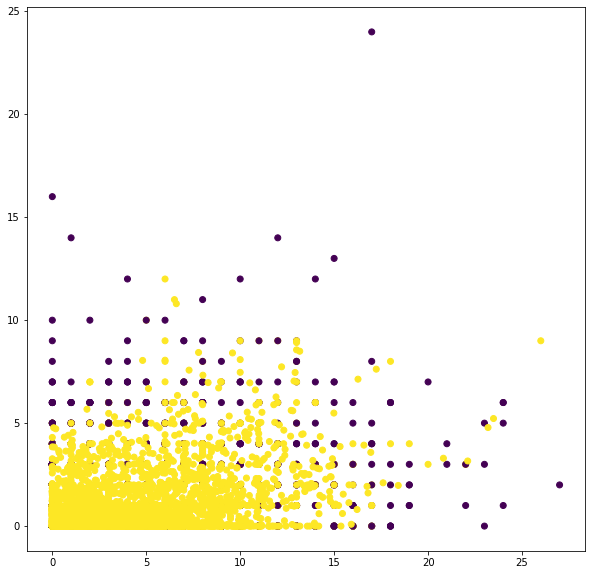

In [71]:
plt.scatter((X_0_oh.to_numpy()[:,0]),(X_0_oh.to_numpy()[:,2]), c= y_0_oh.to_numpy())

Now that we have our datasets imported, we should divide our data into train and test

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_0_oh, y_0_oh, test_size=0.2)

We will work with our model to see how it performs with this train and test groups and the default params.

In [40]:
model.fit(X_train, np.ravel(y_train)).score(X_train, np.ravel(y_train)) #adding np.ravel to avoid 1d error

0.9999233363998773

In [41]:
model.fit(X_train, np.ravel(y_train)).score(X_test, np.ravel(y_test))

0.8862660944206009

Our model might tend to overfitting, since it almost performs a 100% with the train data. We are going to check the parameters used to see if we can adjust it for a better performance

In [47]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Checking Random Forest max_depth plausible

In [86]:
# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 35)]

# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = RandomForestClassifier(max_depth=i)
    
    # fit model on the training dataset
    model.fit(X_train, np.ravel(y_train))

    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(np.ravel(y_train), train_yhat)
    train_scores.append(train_acc)

    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(np.ravel(y_test), test_yhat)
    test_scores.append(test_acc)

    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.636, test: 0.633
>2, train: 0.716, test: 0.719
>3, train: 0.780, test: 0.770
>4, train: 0.793, test: 0.786
>5, train: 0.813, test: 0.800
>6, train: 0.834, test: 0.818
>7, train: 0.845, test: 0.830
>8, train: 0.857, test: 0.834
>9, train: 0.864, test: 0.837
>10, train: 0.880, test: 0.843
>11, train: 0.895, test: 0.851
>12, train: 0.907, test: 0.851
>13, train: 0.925, test: 0.855
>14, train: 0.939, test: 0.862
>15, train: 0.954, test: 0.866
>16, train: 0.966, test: 0.873
>17, train: 0.977, test: 0.878
>18, train: 0.987, test: 0.877
>19, train: 0.991, test: 0.880
>20, train: 0.995, test: 0.882
>21, train: 0.996, test: 0.885
>22, train: 0.998, test: 0.886
>23, train: 0.999, test: 0.886
>24, train: 1.000, test: 0.885
>25, train: 1.000, test: 0.887
>26, train: 1.000, test: 0.888
>27, train: 1.000, test: 0.884
>28, train: 1.000, test: 0.886
>29, train: 1.000, test: 0.890
>30, train: 1.000, test: 0.890
>31, train: 1.000, test: 0.889
>32, train: 1.000, test: 0.891
>33, train: 1.000

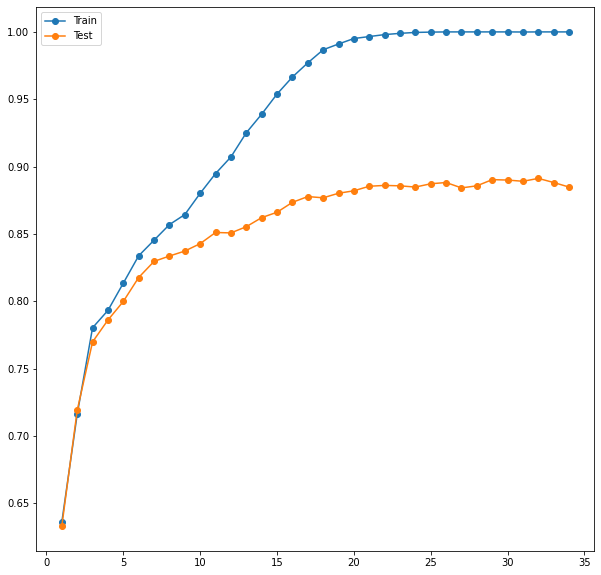

In [87]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

We can see that around 25 of max_depth it gets stabilized. Let's adapt the parameters and try to get our model to perform as best as possible. 

In [ ]:
# checking what bagging exactly is - continue 

In [ ]:
params = {
    'n_estimators': [100, 300, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth':[5,10,15]
}

In [7]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'max_features': ['auto'],
    'min_samples_leaf': [3, 5, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 1000, num = 4)]
}